<table style="width:100%; background-color:transparent; font-style:italic">
  <tr style="background-color:transparent">   
    <td style="text-align:left; background-color:transparent">Datenanalyse mit Python</td>
    <td style="text-align:right; background-color:transparent">Manfred Hammerl</td>
  </tr>
</table>


# 12) Mehrfachantworten auswerten

Dafür gibt es (noch, meines Wissens nach) keine fertige Funktion in **Pandas** (oder sonst wo), im Folgenden daher eine Schritt für Schritt Lösung, welche im Sinne der Nachvollziehbarkeit durchaus etwas länger ist als für die Erreichung des finalen Ziels nötig.

Importieren wird zuerst wieder **Pandas** sowie einen neuen Datensatz, der (fiktive) Daten zur Bekanntheit von 4 Marken enhält. Solche Mehrfachantworten sind typischerweise mit 0/1 kodiert, wobei *1* bsw. für 'kenne die Marke' steht und *0* für 'kenne die Marke nicht'.

In [9]:
import pandas as pd

daten = pd.read_csv("C:\\Datenfiles\\mehrfachantworten.csv")

daten

,nike,head,boss,lacoste
0,1.0,0,0,0
1,1.0,1,0,0
2,1.0,1,1,1
3,0.0,1,0,1
4,0.0,0,0,0
5,0.0,0,0,1
6,NaN,1,0,0
7,0.0,0,0,0
8,1.0,1,1,1


Wie in obiger Tabelle zu sehen, enthält unser Datenfile nur die Werte *1*, *0* und *NaN*. Für die Auswertung spielen *0* und *NaN* keine Rolle, uns interessiert nur der Wert *1* (man kennt die Marke).

Dieser kurze Datensatz ist leicht visuell überprüfbar. Längere Datensätze müsste man mit anderen Methoden prüfen, schließlich will man wissen, welche Werte der Datensatz enthält.

### 12.1) Überprüfung des Datensatzes

Bspw. kann man eine einfache Häufikgeitsauszählung der 4 Variablen durchführen um zu sehen, welche Werte in den einzelnen Variablen enthalten sind. Um die Werte jeder einzelnen unserer 4 Variablen angezeigt zu bekommen, stellen wir folgende **for**-Schleife auf. Damit wird **value_counts()** für jede der 4 Variablen ausgeführt.

In [10]:
for col in daten.columns:
    print(daten[col].value_counts(dropna = False),'\n')
    
# 'dropna = False', damit auch allfällige 'NaN' ausgegeben werden.
# '\n' für eine Leerzeile nach jeder Variable aus Gründen der Übersichtlichkeit

0.0    4
1.0    4
NaN    1
Name: nike, dtype: int64 

1    5
0    4
Name: head, dtype: int64 

0    7
1    2
Name: boss, dtype: int64 

0    5
1    4
Name: lacoste, dtype: int64 



Wie zu sehen (linke Spalte: Werte, rechte Spalte: Häufigkeit des Vorkommens dieser Werte), enthält jede der 4 Variablen die Werte *0* und *1*, sowie die Variable *nike* zusätzlich noch einmal *NaN*. Wir können mit diesen Daten also weiterarbeiten.

### 12.2) Summe der Nennungen pro Variable

Wir berechnen nun die Summe der Nennungen pro Variable, d.h. alle *1*er werden aufsummiert, *0* und *NaN* spielen keine Rolle für die Summenbildung. ACHTUNG: Die einfache Summenbildung, die hier angewandt wird, funktioniert natürlich nur, wenn nur *1*, *0* oder *NaN* vorkommen und uns die *1* Nennungen interessieren. Würden auch andere Zahlen (z.B. *2*, *3* usw.) vorkommen, funktioniert dies nicht! Typischerweise werden Mehrfachantworten in Umfragen aber mit 0/1 kodiert. Sind unterschiedliche Zahlenwerte vorhanden oder soll ein anderer Wert als *1* gezählt werden, helfen die Ausführungen in Kapitel 9 weiter.

[pandas.DataFrame.sum](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sum.html)

[Pandas: sum DataFrame rows for given columns](https://stackoverflow.com/questions/25748683/pandas-sum-dataframe-rows-for-given-columns)


In [11]:
summe = daten[['nike', 'head', 'boss', 'lacoste']].sum(axis = 0).sort_values(ascending = True)

# 'ascending=True' zeigt es zwar in der Tabelle aufsteigend an, aber im Balkendiagramm absteigend (wie es sein soll)!

summe

boss       2.0
nike       4.0
lacoste    4.0
head       5.0
dtype: float64

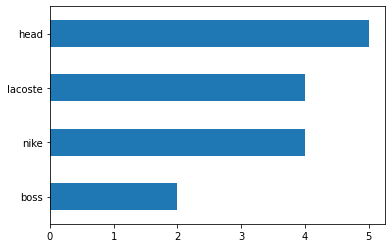

In [12]:
ax = summe.plot.barh()

### 12.3) Prozentwerte der Nennungen pro Variable

Die vorhin berechneten Summen lassen sich auch in relative Häufigkeiten, also Prozentwerte, umrechnen. Dazu ermitteln wir mit **len()** die Anzahl der Zeilen im Dataframe.

[How do I get the row count of a Pandas DataFrame?](https://stackoverflow.com/questions/15943769/how-do-i-get-the-row-count-of-a-pandas-dataframe)

In [13]:
len(daten.index)

9

Nun werden die Summen pro Variable durch die Anzahl der Zeilen des Dataframes dividiert. Dies ergibt die relativen Häufigkeiten (Prozentwerte).

In [14]:
prozent = ((summe/len(daten.index))*100).round(2)

prozent.round(1)

boss       22.2
nike       44.4
lacoste    44.4
head       55.6
dtype: float64

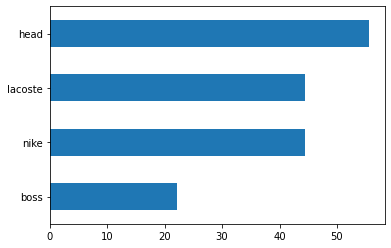

In [15]:
ax = prozent.plot.barh()

##### Absolute Häufigkeiten und Prozentwerte in einem Dataframe verknüpfen

Ziel ist schließlich, alle ermittelten Ergebnisse in einem Dataframe (unsere Outputtabelle) zu verknüpfen. Unsere beiden bisherigen Ergebnisse (absolute und relative Häufigkeiten der Nennungen) verknüpft man wie folgt: Im ersten Schritt werden die beiden Ergebnisse jeweils in ein Dataframe umgewandelt, dabei wird jeweils ein Spaltenname (*Summe* bzw. *Prozent*) sowie ein Name für den Index (*Marke*) vergeben.

In [17]:
s = pd.DataFrame(summe, columns = ["Summe der Nennungen"])
s.index.name = "Marke"

p = pd.DataFrame(prozent, columns = ["Prozent der Befragten"])
p.index.name = "Marke"

Danach werden diese beiden Dataframes zu einem neuen Dataframe zusammengefügt (dies geschieht anhand des in beiden Dataframes vorhandenen Index *Item*).

[pandas.DataFrame.merge](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.merge.html)

In [18]:
set1 = pd.merge(s, p, how = 'outer', on = 'Marke')

set1

,Summe der Nennungen,Prozent der Befragten
Marke,,
boss,2.0,22.22
nike,4.0,44.44
lacoste,4.0,44.44
head,5.0,55.56


Fertig ist unsere erste Outputtabelle. Es gibt aber noch 2 weitere Auswertungsmöglichkeiten, die wir dieser Tabelle hinzufügen können.

### 12.4) Prozent der potenziell möglichen Nennungen

Ev. interessiert uns, wie groß der Anteil der abgegebenen Nennungen relativ zu den insgesamt theoretisch möglichen Nennungen ist. Dazu wird mit **len()** die Anzahl der Spalten (Variablen) ermittelt. ACHTUNG: Dies funktioniert nur, wenn alle im Dataframe vorhandenen Spalten in die Analyse einfließen - wie es in unserem Beispiel der Fall ist. Man kann auf **len()** auch verzichten und in weiterer Folge einfach '4' eintragen, da wir 4 interessierende Spalten haben, bzw. '9' für die Anzahl der Zeilen.

In [19]:
len(daten.columns)

4

Nun wird die Gesamtzahl der Zellen ermittelt...

In [20]:
zellen = (len(daten.index)*len(daten.columns))

... und unsere Häufigkeiten dazu in Beziehung gesetzt.

In [21]:
prozent2 = ((summe/zellen)*100).round(2)

prozent2

Marke
boss        5.56
nike       11.11
lacoste    11.11
head       13.89
dtype: float64

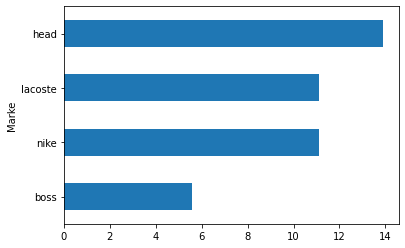

In [22]:
ax = prozent2.plot.barh()

Schließlich wird dieses Ergebnis noch in ein Dataframe umgewandelt.

In [24]:
p2 = pd.DataFrame(prozent2, columns = ['Prozent d ges mögl Nennungen'])

p2.index.name = 'Marke'

p2

,Prozent d ges mögl Nennungen
Marke,
boss,5.56
nike,11.11
lacoste,11.11
head,13.89


### 12.5) Prozent der gesamten tatsächlichen Nennungen

Auch die relative Anzahl unserer Häufigkeiten pro Variable an den gesamten abgegebenen Nennungen über alle Variablen hinweg können wir berechnen. Ermitteln wir dazu zuerst die Summe aller abgegebenen Nennungen (über alle 4 Variablen hinweg)...

In [25]:
anzahl = summe.sum(axis = 0)

anzahl

15.0

... und setzen unsere Häufigkeiten pro Variable nun dazu in Beziehung.

In [26]:
prozent3 = ((summe/anzahl)*100).round(2)

prozent3

Marke
boss       13.33
nike       26.67
lacoste    26.67
head       33.33
dtype: float64

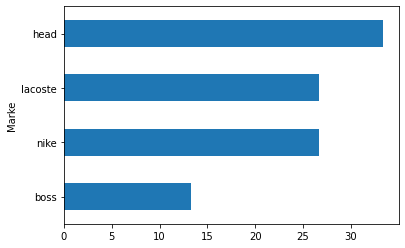

In [27]:
ax = prozent3.plot.barh()

Schließlich überführen wir auch dieses Ergebnis in ein Dataframe.

In [28]:
p3 = pd.DataFrame(prozent3, columns = ["Prozent d ges tats Nennungen"])

p3.index.name = "Marke"

p3

,Prozent d ges tats Nennungen
Marke,
boss,13.33
nike,26.67
lacoste,26.67
head,33.33


### 12.6) Zusammenführung in finales Dataframe, Grafiken, Output speichern

Jetzt müssen wir unsere beiden letzten Ergebnisse noch in unser weiter oben bereits begonnenes finales Outputdataframe einfügen. Man kann jeweils 2 Dataframes zusammenführen. In den beiden folgenden Schritten wird somit jeweils ein weiteres Ergebnis in unser finales Dataframe integriert.

In [29]:
set2 = pd.merge(set1, p2, how = 'outer', on = 'Marke')

set2

,Summe der Nennungen,Prozent der Befragten,Prozent d ges mögl Nennungen
Marke,,,
boss,2.0,22.22,5.56
nike,4.0,44.44,11.11
lacoste,4.0,44.44,11.11
head,5.0,55.56,13.89


In [30]:
set3 = pd.merge(set2, p3, how = 'outer', on = 'Marke')

set3

,Summe der Nennungen,Prozent der Befragten,Prozent d ges mögl Nennungen,Prozent d ges tats Nennungen
Marke,,,,
boss,2.0,22.22,5.56,13.33
nike,4.0,44.44,11.11,26.67
lacoste,4.0,44.44,11.11,26.67
head,5.0,55.56,13.89,33.33


Sehen wir uns diese finalen Ergebnisse nun noch grafisch an. 

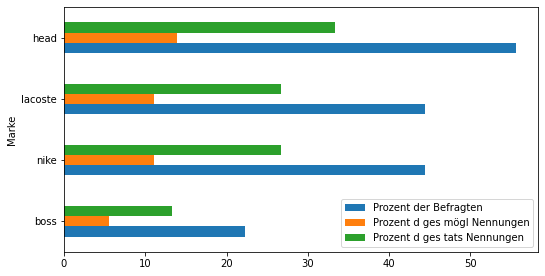

In [31]:
ax = set3[['Prozent der Befragten', 'Prozent d ges mögl Nennungen',
           'Prozent d ges tats Nennungen']].plot.barh(figsize = (8.5,4.5))

# 'ax = set3.plot.barh(figsize = (8.5,4.5))' um alles (also alle 4 Balken pro Marke) zu visualisieren;
# dies macht aber nicht viel Sinn, da Prozentwerte und absolute Häufigkeiten vermischt würden.

Sortieren wird die Balken noch der Länge nach absteigend...

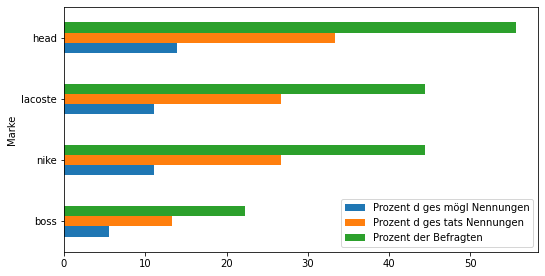

In [32]:
ax = set3[['Prozent d ges mögl Nennungen',
           'Prozent d ges tats Nennungen', 'Prozent der Befragten']].plot.barh(figsize = (8.5,4.5))

# gleich Grafik wie vorhin, nur sind die Balken nun nach Größe angeordnet...

##### "Styling" der Outputtabelle

Man kann die Outputtabelle auch gestalten, z.B. in die Beschriftung der X-Achse '%' einfügen. Dies hat jedoch nur ästethische Auswirkungen und wird nicht im Dataframe zur weiteren Verwendung gespeichert.

[Finer Control: Display Values](https://pandas.pydata.org/pandas-docs/stable/user_guide/style.html#Finer-Control:-Display-Values)

In [38]:
set3.style.format({
    "Summe der Nennungen" : "{:.0f}", # 0 Dezimalstellen
    'Prozent der Befragten' : '{:.1f}%', # 1 Dezimalstelle und '%'
    "Prozent d ges mögl Nennungen" : "{:.1f}%",
    "Prozent d ges tats Nennungen" : "{:.1f}%"
})

,Summe der Nennungen,Prozent der Befragten,Prozent d ges mögl Nennungen,Prozent d ges tats Nennungen
Marke,,,,
boss,2,22.2%,5.6%,13.3%
nike,4,44.4%,11.1%,26.7%
lacoste,4,44.4%,11.1%,26.7%
head,5,55.6%,13.9%,33.3%


##### Speichern des Dataframes

Obige Tabelle (ohne das "Styling") kann mit **to_clipboard()** exportiert (d.h. in die Zwischenablage kopiert) werden, damit man sie dann bspw. leicht in Excel oder ähnlichen Programmen einfügen und weiterverwenden kann.

In [34]:
set3.to_clipboard(decimal = ",")

# Angabe von 'decimal = ","' ist wichtig, da ansonsten ein '.' als Dezimaltrennzeichen verwendet wird;
# dies ist im deutschsprachigen Raum jedoch nicht üblich und führt zu Problemen, bspw. wenn man den Output in eine Excel-Tabelle einfügt.

### Exkurs: Aufruf der Funktion **mr()** zur Auswertungen von Mehrfachantworten

Alles was in diesem Notebook bisher behandelt wurde, habe ich in der Funktion **mr()** zusammengefasst. Unter folgendem Link finden sich alle weiteren Infos dazu:

[mr - multiple responses](https://github.com/manfred2020/multiple-responses)

In [35]:
from mr import mr # Import der Funktion 'mr' aus dem Modul (dem File) 'mr'

,Anz Nennungen,% Befragte,% mögl Nennungen,% tatsächl Nennungen
boss,2,22.2%,5.6%,13.3%
nike,4,44.4%,11.1%,26.7%
lacoste,4,44.4%,11.1%,26.7%
head,5,55.6%,13.9%,33.3%


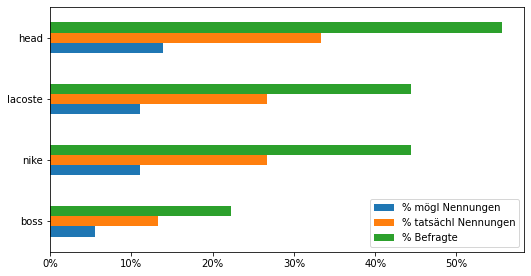

In [37]:
mr(daten, "nike", "head", "boss", "lacoste") # das Dataframe 'daten' wurde ja zu Beginn schon importiert

# das Dataframe ('daten') sowie die auszuwertenden Spalten werden angegeben. Das war's.

<table style="width:100%; background-color:transparent; font-style:italic">
  <tr style="background-color:transparent">   
     <td style="text-align:center; background-color:transparent">https://github.com/manfred2020/DA_mit_Python</td>
  </tr>
</table>